In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point
from matplotlib.patches import Patch
import matplotlib.colors as colors

In [184]:
#Read the data file
file = pd.read_csv("alt_fuel_stations.csv")

/var/folders/00/_31k1685763b4smdxp304cnc0000gn/T/ipykernel_38340/308735105.py:2: DtypeWarning: Columns (3,6,13,14,15,16,20,29,31,33,34,35,36,43,45,46,47,49,52,53,54,56,57,58,59,60,61,62,63,64,65,67,69) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv("alt_fuel_stations.csv")


In [111]:
file.columns

Index(['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'EV Connector Types', 'Country',
       'Intersection Directions (French)', 'Access Days Time (French)',
       'BD Blends (French)', 'Groups With Access Code (French)',
       'Hydrogen Is Retail', 'Access Code', 'Access Detail Code',
       'Federal Agency Code', 'Facility Type', 'CNG Dispenser N

Are there any regional disparities in where charging stations are placed? (Such as Income Inequality)


In [8]:
states = geopandas.read_file('tl_2017_us_state.shp')

In [9]:
states = states.to_crs("EPSG:4326")

In [120]:
#Convert data to geodata
new_file = file.copy()
crs = {'init':'epsg:4326'}

states_ab = ['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

#Clean State Data
new_file = new_file[new_file['State'].isin(states_ab)]
new_file = new_file[new_file['State'].notna()]

#Limit lat and long to just the US
new_file = new_file[(new_file['Latitude'] < 50) & (new_file['Latitude'] > 22)]
new_file = new_file[(new_file['Longitude'] > -130) & (new_file['Longitude'] < -60)]

#Only print EV charging stations
new_file = new_file[new_file['Fuel Type Code']=='ELEC']

geometry = [Point(xy) for xy in zip(new_file['Longitude'], new_file['Latitude'])]
geo_df = geopandas.GeoDataFrame(new_file, crs=crs, geometry=geometry) 

/Users/jackieloyola/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


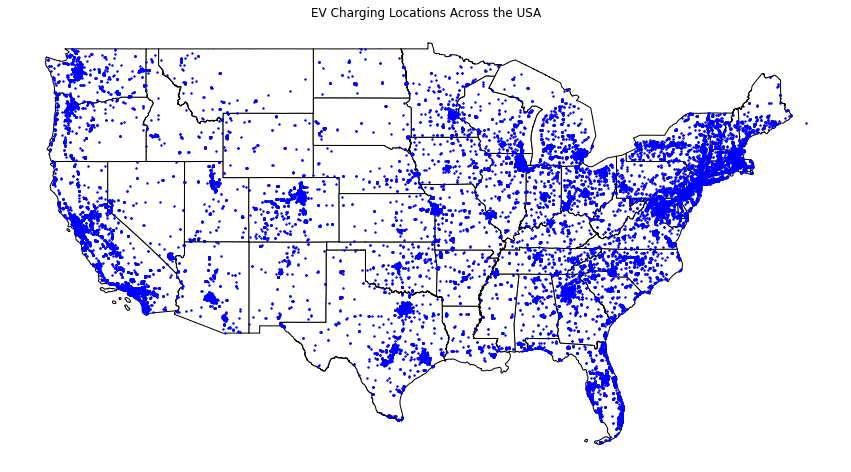

In [11]:
#Plot map and data
f, ax = plt.subplots(figsize=(15, 20))


states.loc[(states['STATEFP'] != "60") &
           (states['STATEFP'] != "66") &
           (states['STATEFP'] != "69") &
           (states['STATEFP'] != "72") &
           (states['STATEFP'] != "78") &
           (states['STATEFP'] != "15") &
           (states['STATEFP'] != "02")
          ].plot(ax=ax, edgecolor='black', color = 'white')
geo_df.plot(ax=ax, markersize=2, color='blue', marker='o')

plt.title("EV Charging Locations Across the USA")
ax.set_axis_off()


Reference:
https://www.census.gov/topics/income-poverty/income/data/datasets.html

In [150]:
#Median Income Data by State in 2018
income = pd.read_csv("state_income.csv")

In [151]:
income = income.drop([0])
income.head()

income = income[['Table with row headers in column A and column headers in rows 5 and 6, and 60 and 61','Unnamed: 1']].copy()
income.columns = ["State", "Median Income"]

In [152]:
income = income.set_index("State")
income = income.dropna()
income = income.sort_values(by="Median Income")
income

,Median Income
State,
Mississippi,"42,781"
New Mexico,"48,283"
Arkansas,"49,781"
Alabama,"49,936"
Louisiana,"49,973"
West Virginia,"50,573"
North Carolina,"53,369"
Oklahoma,"54,434"
Kentucky,"54,555"


In [153]:
charger_count = (new_file["State"].value_counts()).to_frame()

states_ab_long = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'D.C.',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

charger_count.columns = ["Total # of Chargers"]
charger_count["State"] = charger_count.index.to_series().map(states_ab_long)
charger_count.set_index("State")

,Total # of Chargers
State,
California,16091
New York,3780
Florida,3202
Texas,2757
Massachusetts,2722
Colorado,1949
Washington,1940
Georgia,1769
Maryland,1513


In [154]:
indi_chargers = new_file.groupby("State")[['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count',]].sum()
indi_chargers.index = indi_chargers.index.to_series().map(states_ab_long)
indi_chargers["Total individual Chargers"] = indi_chargers["EV Level1 EVSE Num"] + indi_chargers["EV Level2 EVSE Num"] + indi_chargers["EV DC Fast Count"]
indi_chargers = indi_chargers.drop(["EV Level1 EVSE Num", "EV Level2 EVSE Num", "EV DC Fast Count"], axis=1)
indi_chargers

,Total individual Chargers
State,
Alabama,899.0
Arkansas,698.0
Arizona,2869.0
California,46005.0
Colorado,4696.0
Connecticut,1809.0
D.C.,999.0
Delaware,383.0
Florida,8349.0


In [155]:
#Merge both dataframes
merged_df = pd.merge(income, charger_count, on="State")
merged_df = pd.merge(merged_df, indi_chargers, on="State")
merged_df = merged_df.set_index("State")
merged_df

,Median Income,Total # of Chargers,Total individual Chargers
State,,,
Mississippi,"42,781",124,460.0
New Mexico,"48,283",260,619.0
Arkansas,"49,781",274,698.0
Alabama,"49,936",357,899.0
Louisiana,"49,973",223,554.0
West Virginia,"50,573",141,386.0
North Carolina,"53,369",1299,3366.0
Oklahoma,"54,434",357,1124.0
Kentucky,"54,555",271,660.0


Reference: https://www.kff.org/other/state-indicator/state-political-parties/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D

In [156]:
poli_aff = pd.read_csv("political_aff.csv")
poli_aff = poli_aff.rename(columns={"Location":"State"})
poli_aff = poli_aff.set_index("State")

In [157]:
merged_df = pd.merge(merged_df, poli_aff, on="State")

In [158]:
merged_df.sort_values(by="Total # of Chargers")

,Median Income,Total # of Chargers,Total individual Chargers,Governor Political Affiliation
State,,,,
South Dakota,"59,463",87,207.0,Republican
North Dakota,"66,505",89,182.0,Republican
Wyoming,"62,539",96,227.0,Republican
Montana,"57,679",106,266.0,Republican
Mississippi,"42,781",124,460.0,Republican
West Virginia,"50,573",141,386.0,Republican
Delaware,"65,012",163,383.0,Democrat
Idaho,"58,728",170,409.0,Republican
New Hampshire,"81,346",214,487.0,Republican


Reference: https://www.statista.com/statistics/248932/us-state-government-tax-revenue-by-state/?locale=en

In [159]:
state_revenue = pd.read_csv("state_revenue.csv")
state_revenue = state_revenue.set_index("State")

In [160]:
merged_df = pd.merge(merged_df, state_revenue, on="State")

In [161]:
merged_df = merged_df.sort_values(by="Total individual Chargers")

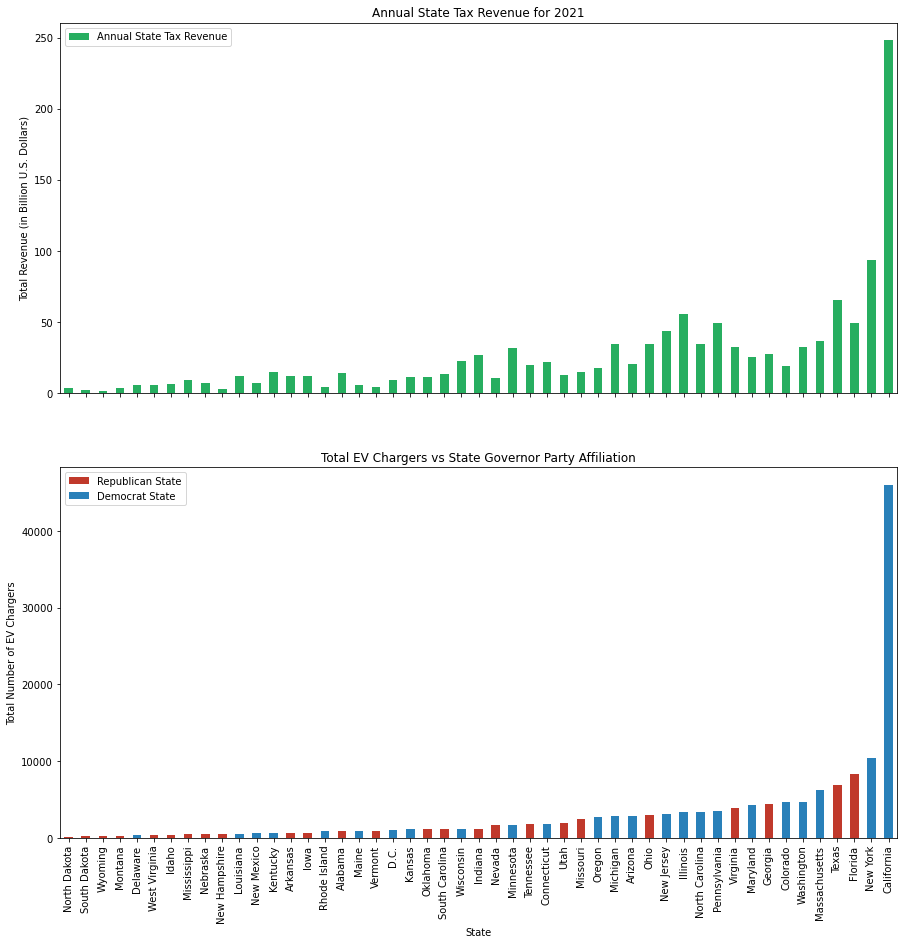

In [162]:
fig,axes = plt.subplots(nrows=2, ncols=1, figsize=(15,15),sharex=True)
x_axis = np.arange(len(merged_df.index))

colors = {"Republican": "#c0392b", "Democrat": "#2980b9"}

merged_df["Total individual Chargers"].plot(
    kind="bar",
    color=merged_df["Governor Political Affiliation"].replace(colors),
    ax = axes[1]
).legend(
    [
        Patch(facecolor=colors['Republican']),
        Patch(facecolor=colors['Democrat'])
    ], ["Republican State", "Democrat State"]
)

merged_df["Revenue"].plot(
    kind="bar",
    color="#27ae60",
    ax = axes[0]
).legend(
    [
        Patch(facecolor="#27ae60")
    ], ["Annual State Tax Revenue"], loc="upper left"
)

plt.xticks(x_axis, merged_df.index, rotation=90)
plt.xlabel("State")
axes[0].title.set_text("Annual State Tax Revenue for 2021")
axes[1].title.set_text("Total EV Chargers vs State Governor Party Affiliation")
axes[0].set_ylabel("Total Revenue (in Billion U.S. Dollars)")
axes[1].set_ylabel("Total Number of EV Chargers")
pass

Reference: https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html

In [163]:
pop = pd.read_csv("population.csv")
pop.set_index("State")

,2022 Population
State,
Alabama,"5,074,296"
Alaska,"733,583"
Arizona,"7,359,197"
Arkansas,"3,045,637"
California,"39,029,342"
Colorado,"5,839,926"
Connecticut,"3,626,205"
Delaware,"1,018,396"
D.C.,"671,803"


In [164]:
merged_df = pd.merge(merged_df, pop, on="State")

In [165]:
merged_df['2022 Population'] = merged_df['2022 Population'].apply(lambda x: float(x.replace(',', '')))

In [166]:
merged_df["Charger Per Person"] = merged_df["Total individual Chargers"].astype(float)/merged_df["2022 Population"].astype(float)

In [167]:
merged_df = merged_df.set_index("State")

In [144]:
merged_df

,Median Income,Total # of Chargers,Total individual Chargers,Governor Political Affiliation,Revenue,2022 Population,Charger Per Person
State,,,,,,,
South Dakota,"59,463",87,207.0,Republican,2.15,909824.0,0.000096
North Dakota,"66,505",89,182.0,Republican,3.91,779261.0,0.000114
Wyoming,"62,539",96,227.0,Republican,1.87,581381.0,0.000165
Montana,"57,679",106,266.0,Republican,3.88,1122867.0,0.000094
Mississippi,"42,781",124,460.0,Republican,9.35,2940057.0,0.000042
West Virginia,"50,573",141,386.0,Republican,6.05,1775156.0,0.000079
Delaware,"65,012",163,383.0,Democrat,5.40,1018396.0,0.000160
Idaho,"58,728",170,409.0,Republican,6.47,1939033.0,0.000088
New Hampshire,"81,346",214,487.0,Republican,3.21,1395231.0,0.000153


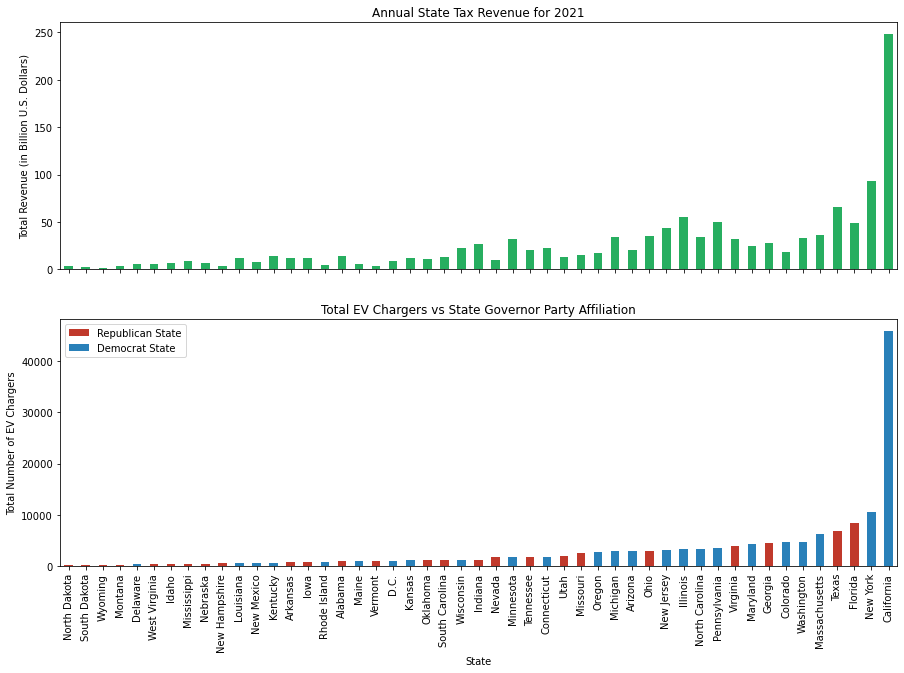

In [248]:
fig,axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10),sharex=True)
x_axis = np.arange(len(merged_df.index))

colors = {"Republican": "#c0392b", "Democrat": "#2980b9"}

merged_df["Total individual Chargers"].plot(
    kind="bar",
    color=merged_df["Governor Political Affiliation"].replace(colors),
    ax = axes[1]
).legend(
    [
        Patch(facecolor=colors['Republican']),
        Patch(facecolor=colors['Democrat'])
    ], ["Republican State", "Democrat State"]
)

merged_df["Revenue"].plot(
    kind="bar",
    color="#27ae60",
    ax = axes[0]
)

plt.xticks(x_axis, merged_df.index, rotation=90)
plt.xlabel("State")
axes[0].title.set_text("Annual State Tax Revenue for 2021")
axes[1].title.set_text("Total EV Chargers vs State Governor Party Affiliation")
axes[0].set_ylabel("Total Revenue (in Billion U.S. Dollars)")
axes[1].set_ylabel("Total Number of EV Chargers")
pass

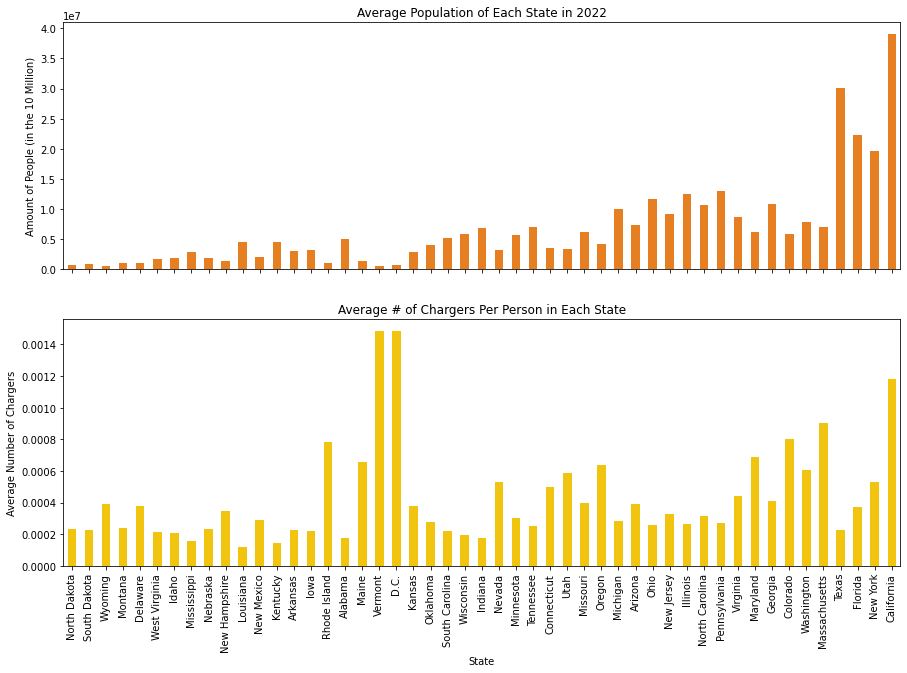

In [247]:
fig,axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10),sharex=True)
x_axis = np.arange(len(merged_df.index))

merged_df["2022 Population"].plot(
    kind="bar",
    color="#e67e22",
    ax = axes[0]
)

merged_df["Charger Per Person"].plot(
    kind="bar",
    color="#f1c40f",
    ax = axes[1]
)

plt.xticks(x_axis, merged_df.index, rotation=90)
plt.xlabel("State")
axes[1].title.set_text("Average # of Chargers Per Person in Each State")
axes[0].title.set_text("Average Population of Each State in 2022")
axes[1].set_ylabel("Average Number of Chargers")
axes[0].set_ylabel("Amount of People (in the 10 Million)")
pass

-Top 10 states with EV chargers
->70% Democrat, 30% Republican
->Highest average annual state tax revenue

-Bottom 10 states with EV chargers
->80% Republican, 20% Democrat
->Lowest average annual state tax revenue

-It looks like most Republican governors value lower taxes over adding more EV chargers

-Average population in each state also somewhat correlates with the number of EV chargers
-Although the number of EV chargers and total tax revenue in California is drastically more than every other state in comparison with it's average population
-Maybe its because Tesla was the revolutionary company that changed the game for EV vehicles and it was originally headquartered in CA?

-Surprisingly with the top 5 states of EV chargers, their Charger-to-Person ratio isn't that much higher than everyone else

How many stations did each State open each year? Have some states been more proactive than others?

In [237]:
file = pd.read_csv("alt_fuel_stations.csv")

/var/folders/00/_31k1685763b4smdxp304cnc0000gn/T/ipykernel_38340/3418129521.py:1: DtypeWarning: Columns (3,6,13,14,15,16,20,29,31,33,34,35,36,43,45,46,47,49,52,53,54,56,57,58,59,60,61,62,63,64,65,67,69) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv("alt_fuel_stations.csv")


In [238]:
file["Open Date"] = file["Open Date"].str[:4]
file = file.groupby("State")["Open Date"].value_counts().unstack()

In [239]:
date_df = file[["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022","2023"]].copy()
date_df["Total Chargers Open Past 10 Years"] = date_df.sum(axis=1)
date_df.index = date_df.index.to_series().map(states_ab_long)
date_df = date_df.sort_values(by="Total Chargers Open Past 10 Years")

In [240]:
date_df = pd.merge(date_df, poli_aff, on="State")
date_df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total Chargers Open Past 10 Years,Governor Political Affiliation
State,,,,,,,,,,,,,,,,
Alaska,NaN,NaN,NaN,NaN,1.0,2.0,NaN,5.0,7.0,4.0,16.0,16.0,12.0,NaN,63.0,Republican
Wyoming,NaN,2.0,4.0,3.0,9.0,15.0,7.0,17.0,12.0,8.0,4.0,10.0,18.0,10.0,119.0,Republican
Montana,1.0,NaN,1.0,4.0,10.0,15.0,9.0,8.0,11.0,8.0,13.0,11.0,31.0,3.0,125.0,Republican
South Dakota,4.0,2.0,10.0,4.0,3.0,18.0,1.0,9.0,12.0,13.0,6.0,19.0,18.0,12.0,131.0,Republican
North Dakota,5.0,3.0,7.0,NaN,6.0,7.0,2.0,3.0,12.0,13.0,26.0,26.0,10.0,11.0,131.0,Republican
Delaware,NaN,NaN,8.0,4.0,5.0,8.0,3.0,19.0,7.0,16.0,21.0,53.0,35.0,6.0,185.0,Democrat
Mississippi,6.0,NaN,24.0,30.0,6.0,13.0,9.0,20.0,10.0,13.0,21.0,15.0,18.0,2.0,187.0,Republican
Idaho,7.0,3.0,5.0,5.0,6.0,26.0,25.0,14.0,11.0,15.0,13.0,28.0,21.0,13.0,192.0,Republican
West Virginia,1.0,3.0,13.0,5.0,9.0,7.0,8.0,61.0,6.0,6.0,12.0,28.0,30.0,3.0,192.0,Republican


Text(0.5, 1.0, 'Total Number of Chargers Opened in the Past 10 Years')

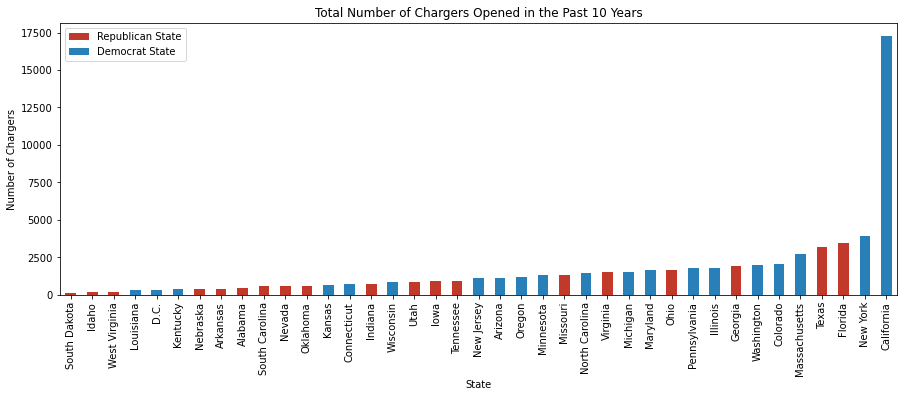

In [243]:
date_df = date_df.dropna()
fig = plt.figure(figsize=(15,5))
x_axis = np.arange(len(date_df.index))

colors = {"Republican": "#c0392b", "Democrat": "#2980b9"}

date_df["Total Chargers Open Past 10 Years"].plot(
    kind="bar",
    color=date_df["Governor Political Affiliation"].replace(colors),
).legend(
    [
        Patch(facecolor=colors['Republican']),
        Patch(facecolor=colors['Democrat'])
    ], ["Republican State", "Democrat State"]
)

plt.ylabel("Number of Chargers")
plt.title("Total Number of Chargers Opened in the Past 10 Years")